In [2]:
# imports 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf 

[*********************100%***********************]  4 of 4 completed


time_steps: (100,)
real_returns shape: (100, 4)


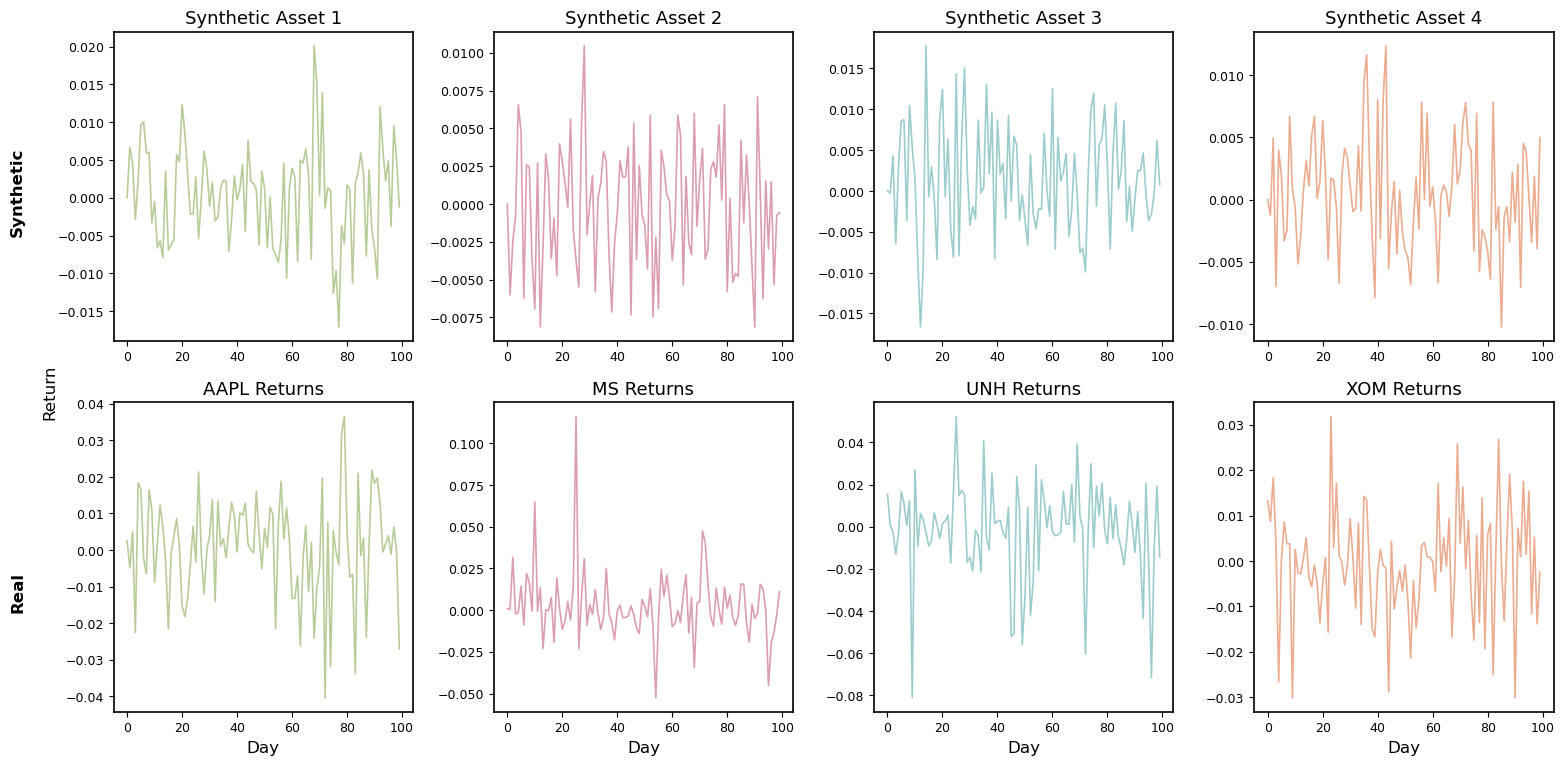

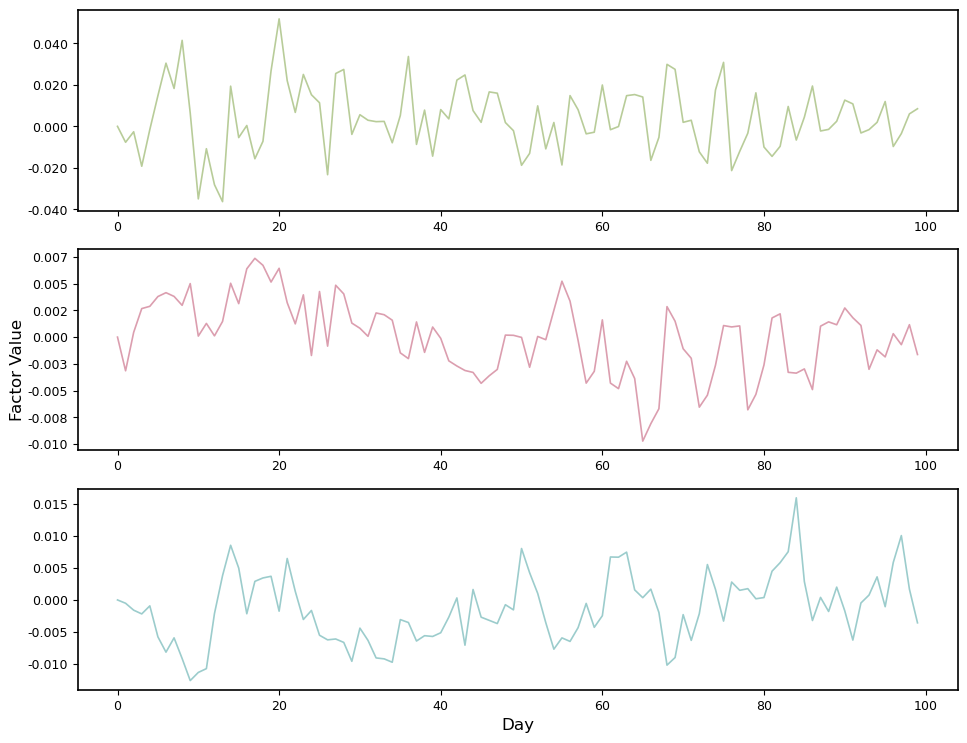

In [ ]:
# synthetic data visualizations: 
plt.rcParams.update({
    'font.size': 12,
    'axes.linewidth': 1.2,
    'axes.labelsize': 12,
    'axes.titlesize': 13,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 14,
    'lines.linewidth': 1.5,
    'axes.grid': False,
    'axes.axisbelow': True,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white'
})

# figure 1: 4 real vs. 4 synthetic asset returns over 100 days 
assetreturns = pd.read_csv('assetReturns_garch.csv', parse_dates=True)
synthetic = assetreturns.iloc[:100, 0:4]
tickers = ['AAPL', 'MS', 'UNH', 'XOM']
real_data = yf.download(tickers, start='2024-10-01', end='2025-07-01', auto_adjust=False)['Adj Close']
real_returns = real_data.pct_change().dropna().iloc[:100]
fig1, axs1 = plt.subplots(2, 4, figsize=(16, 8))
time_steps = np.arange(100)
colors = ['#A7C080', '#D3869B', "#83C0C0", '#E69875']

# plot synthetic returns 
for i in range(4):
    axs1[0, i].plot(time_steps, synthetic.iloc[:, i], color=colors[i], linewidth=1.2, alpha=0.8)
    axs1[0, i].set_title(f'Synthetic Asset {i+1}', fontweight='normal')
    axs1[0, i].tick_params(axis='both', which='major', labelsize=9)
    axs1[0, i].set_ylim(axs1[0, i].get_ylim())  # Fix y-axis limits
print("time_steps:", time_steps.shape)
print("real_returns shape:", real_returns.shape)
# plot real returns 
for i in range(4):
    axs1[1, i].plot(time_steps, real_returns.iloc[:, i], color=colors[i], linewidth=1.2, alpha=0.8)
    axs1[1, i].set_title(f'{tickers[i]} Returns', fontweight='normal')
    axs1[1, i].tick_params(axis='both', which='major', labelsize=9)
    axs1[1, i].set_xlabel('Day')

# add labels to the graph 
fig1.text(0.02, 0.75, 'Synthetic', rotation=90, va='center', ha='center', fontsize=12, fontweight='bold')
fig1.text(0.02, 0.25, 'Real', rotation=90, va='center', ha='center', fontsize=12, fontweight='bold')
fig1.text(0.04, 0.5, 'Return', rotation=90, va='center', ha='center', fontsize=12)

plt.tight_layout()
plt.subplots_adjust(left=0.08, right=0.98, top=0.95, bottom=0.1)

plt.savefig('figure1_returns_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


# figure 2: latent factor graphs over the first 100 days of simulation 
latentfactors = pd.read_csv('latentFactors_garch.csv', parse_dates=True)
latent_subset = latentfactors.iloc[:100, :3]

fig2, axs2 = plt.subplots(3, 1, figsize=(10, 8))
axs2 = np.atleast_1d(axs2)

latent_colors = ['#A7C080', '#D3869B', "#83C0C0"]

factor_names = ['Factor 1', 'Factor 2', 'Factor 3'] 

for i in range(3):
    axs2[i].plot(time_steps, latent_subset.iloc[:, i], color=latent_colors[i], 
                linewidth=1.2, alpha=0.8)
    axs2[i].tick_params(axis='both', which='major', labelsize=9)
    axs2[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.3f}'))

# label axes 
axs2[2].set_xlabel('Day')
fig2.text(0.04, 0.5, 'Factor Value', rotation=90, va='center', ha='center', fontsize=12)

plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.98, top=0.95, bottom=0.1)

plt.savefig('figure2_latent_factors.png', dpi=300, bbox_inches='tight')
plt.show()

plt.rcdefaults()


In [3]:
# stock universe creation code for visualizations 
# note that in this visualization, stocks that fit into two sectors are represented duplicately, ex. AAPL in tech and consumer.
class EnhancedStockDataFramework:
    def __init__(self, start_date="2015-01-01", end_date="2024-12-31"):
        self.start_date = start_date
        self.end_date = end_date
        self.raw_data = None
        self.processed_data = None
        self.failed_downloads = []
        self.successful_tickers = []
        
    def get_stock_universe(self):
        #Define stock universes with current, active tickers
         # Comprehensive universe (200 stocks)
        tickers = [
                # tech
                'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA', 'NFLX', 'ADBE', 'CRM',
                'ORCL', 'INTC', 'AMD', 'QCOM', 'AVGO', 'TXN', 'AMAT', 'LRCX', 'KLAC', 'MRVL',
                
                # finance
                'JPM', 'BAC', 'WFC', 'C', 'GS', 'MS', 'BK', 'USB', 'PNC', 'TFC',
                'COF', 'AXP', 'V', 'MA', 'PYPL', 'BRK-B', 'BLK', 'SPGI', 'ICE', 'CME',
                
                # health and pharma 
                'JNJ', 'PFE', 'UNH', 'ABT', 'TMO', 'DHR', 'BMY', 'MRK', 'ABBV', 'AMGN',
                'GILD', 'BIIB', 'REGN', 'VRTX', 'ILMN', 'ISRG', 'SYK', 'BSX', 'MDT', 'EW',
                
                # consumer discretionary 
                'AMZN', 'TSLA', 'HD', 'MCD', 'NKE', 'SBUX', 'TJX', 'LOW', 'BKNG', 'ABNB',
                'DIS', 'NFLX', 'CMCSA', 'VZ', 'T', 'CHTR', 'TMUS', 'ROKU', 'SPOT', 'UBER',
                
                # consumer staples
                'PG', 'KO', 'PEP', 'WMT', 'COST', 'CL', 'KMB', 'GIS', 'K', 'CPB',
                'TSN', 'HRL', 'SJM', 'CAG', 'MKC', 'CLX', 'CHD', 'EL', 'ULTA', 'TGT',
                
                # industrial and manufacturing
                'BA', 'CAT', 'DE', 'GE', 'HON', 'UPS', 'FDX', 'LMT', 'RTX', 'NOC',
                'MMM', 'EMR', 'ETN', 'ITW', 'PH', 'CMI', 'ROK', 'DOV', 'FTV', 'XYL',
                
                # energy and utilities
                'XOM', 'CVX', 'COP', 'EOG', 'PXD', 'VLO', 'MPC', 'PSX', 'KMI', 'OKE',
                'NEE', 'DUK', 'SO', 'AEP', 'EXC', 'XEL', 'PEG', 'ED', 'AWK', 'ATO',
                
                # materials and basic industries 
                'LIN', 'APD', 'ECL', 'SHW', 'FCX', 'NEM', 'FMC', 'LYB', 'DD', 'DOW',
                'PPG', 'NUE', 'STLD', 'MLM', 'VMC', 'PKG', 'IP', 'WRK', 'SON', 'AVY',
                
                # real estate and REITs
                'AMT', 'PLD', 'CCI', 'EQIX', 'SPG', 'O', 'WELL', 'AVB', 'EQR', 'DLR',
                'BXP', 'VTR', 'ARE', 'MAA', 'UDR', 'CPT', 'KIM', 'REG', 'FRT', 'BRX',
                
                # communication services
                'GOOGL', 'META', 'NFLX', 'DIS', 'CMCSA', 'VZ', 'T', 'CHTR', 'TMUS', 'TWTR',
                'SNAP', 'PINS', 'MTCH', 'IAC', 'FOXA', 'PARA', 'WBD', 'LUMN', 'SIRI', 'DISH',
                
                # emerging growth and others
                'SHOP', 'ZM', 'DOCU', 'OKTA', 'SNOW', 'PLTR', 'RBLX', 'HOOD', 'COIN', 'RIVN'
            ]
        # Remove duplicates and return unique tickers
        return list(set(tickers))
    
    def download_data(self, tickers, max_retries=3):
        print(f"Downloading data for {len(tickers)} stocks...")
        print(f"Date range: {self.start_date} to {self.end_date}")
        
        successful_data = {}
        failed_downloads = []
        
        batch_size = 10
        for i in range(0, len(tickers), batch_size):
            batch = tickers[i:i+batch_size]
            
            for ticker in batch:
                success = False
                for attempt in range(max_retries):
                    try:
                        # download each ticker 
                        stock = yf.Ticker(ticker)
                        hist = stock.history(start=self.start_date, end=self.end_date)
                        
                        if not hist.empty and len(hist) > 252: 
                            successful_data[ticker] = hist['Close']
                            success = True
                            break
                        else:
                            print(f"{ticker} has insufficient data ({len(hist)} days)")
                            
                    except Exception as e:
                        print(f"Attempt {attempt + 1} failed for {ticker}: {str(e)}")
                        continue
                
                if not success:
                    failed_downloads.append(ticker)
            
            # Progress indicator
            print(f"Processed {min(i + batch_size, len(tickers))} of {len(tickers)} stocks")
        
        self.failed_downloads = failed_downloads
        self.successful_tickers = list(successful_data.keys())
        
        if successful_data:
            # Convert to DataFrame
            self.raw_data = pd.DataFrame(successful_data)
            print(f"\nSuccessfully downloaded {len(successful_data)} stocks")
            print(f"Failed downloads: {len(failed_downloads)}")
            if failed_downloads:
                print(f"Failed tickers: {failed_downloads[:10]}...")  # Show first 10
        else:
            print("no data downloaded")
            return False
        
        return True
    
    def clean_data(self, min_trading_days=252, max_zero_days=5):
        # Clean and filter the data
        if self.raw_data is None or self.raw_data.empty:
            print("no raw data")
            return False
        
        print(f"Initial data shape: {self.raw_data.shape}")
        
        # remove stocks with insufficient data
       #initial_count = len(self.raw_data.columns)
        self.raw_data = self.raw_data.dropna(thresh=min_trading_days, axis=1)
        print(f"After removing stocks with insufficient data: {self.raw_data.shape}")
        
        # remove stocks with too many zero-price days
        zero_counts = (self.raw_data <= 0).sum()
        valid_stocks = zero_counts[zero_counts <= max_zero_days].index
        self.raw_data = self.raw_data[valid_stocks]
        print(f"After removing stocks with excessive zero prices: {self.raw_data.shape}")
        
        # forward fill missing values (up to 5 days)
        self.raw_data = self.raw_data.fillna(method='ffill', limit=5)
        
        # remove any remaining NaN values
        self.raw_data = self.raw_data.dropna()
        
        if self.raw_data.empty:
            print("dataset is empty")
            return False
        
        print(f"cleaned data shape: {self.raw_data.shape}")
        return True
    
    def calculate_returns(self):
        # calculate daily returns and basic statistics
        if self.raw_data is None or self.raw_data.empty:
            print("no data available")
            return False
        
        # calculate daily returns
        returns = self.raw_data.pct_change().dropna()
        
        # remove extreme outliers 
        extreme_threshold = 0.5
        returns_clean = returns.copy()
        
        # cap extreme returns
        returns_clean = returns_clean.clip(lower=-extreme_threshold, upper=extreme_threshold)
        
        # calculate basic statistics
        mean_returns = returns_clean.mean()
        volatility = returns_clean.std() * np.sqrt(252)  
        
        # create summary statistics
        self.processed_data = {
            'returns': returns_clean,
            'prices': self.raw_data,
            'mean_daily_return': mean_returns.mean(),
            'mean_daily_volatility': volatility.mean(),
            'num_stocks': len(returns_clean.columns),
            'num_days': len(returns_clean),
            'date_range': f"{returns_clean.index[0].strftime('%Y-%m-%d')} to {returns_clean.index[-1].strftime('%Y-%m-%d')}"
        }
        
        return True
    
    def generate_summary(self):
        # generate a comprehensive summary of the dataset
        if self.processed_data is None:
            print("no processed data available")
            return
        
        print(f"downloads: {self.processed_data['num_stocks']} stocks")
        print(f"failed downloads: {len(self.failed_downloads)} stocks")
        print(f"date range: {self.processed_data['date_range']}")
        print(f"trading days: {self.processed_data['num_days']}")
        
        print(f"\n metrics:")
        print(f"Mean daily return: {self.processed_data['mean_daily_return']:.6f}")
        print(f"Mean daily volatility: {self.processed_data['mean_daily_volatility']:.4f}")
        
        if self.failed_downloads:
            print(f"\n Failed tickers: {self.failed_downloads[:10]}")
    
    def run_complete_pipeline(self):
        tickers = self.get_stock_universe()
        
        if not self.download_data(tickers):
            print("no data downloaded")
            return False
        
        if not self.clean_data():
            print("no data remaining after cleaning")
            return False
        
        if not self.calculate_returns():
            print("no data available")
            return False
        
        # Generate summary
        self.generate_summary()
        
        return True

if __name__ == "__main__":
    framework = EnhancedStockDataFramework(
        start_date="2015-01-01",
        end_date="2024-12-31"
    )
    
    # run the complete pipeline
    success = framework.run_complete_pipeline()

Date range: 2015-01-01 to 2024-12-31
Processed 10 of 198 stocks
Processed 20 of 198 stocks
Processed 30 of 198 stocks
Processed 40 of 198 stocks
Processed 50 of 198 stocks
Processed 60 of 198 stocks
Processed 70 of 198 stocks
Processed 80 of 198 stocks
Processed 90 of 198 stocks
Processed 100 of 198 stocks
Processed 110 of 198 stocks


$DISH: possibly delisted; no timezone found
$DISH: possibly delisted; no timezone found
$DISH: possibly delisted; no timezone found


DISH has insufficient data (0 days)
DISH has insufficient data (0 days)
DISH has insufficient data (0 days)
Processed 120 of 198 stocks
Processed 130 of 198 stocks


$TWTR: possibly delisted; no price data found  (1d 2015-01-01 -> 2024-12-31)
$TWTR: possibly delisted; no price data found  (1d 2015-01-01 -> 2024-12-31)
$TWTR: possibly delisted; no price data found  (1d 2015-01-01 -> 2024-12-31)


TWTR has insufficient data (0 days)
TWTR has insufficient data (0 days)
TWTR has insufficient data (0 days)
Processed 140 of 198 stocks
Processed 150 of 198 stocks


$PXD: possibly delisted; no timezone found
$PXD: possibly delisted; no timezone found
$PXD: possibly delisted; no timezone found


PXD has insufficient data (0 days)
PXD has insufficient data (0 days)
PXD has insufficient data (0 days)
Processed 160 of 198 stocks
Processed 170 of 198 stocks
Processed 180 of 198 stocks


$WRK: possibly delisted; no timezone found
$WRK: possibly delisted; no timezone found
$WRK: possibly delisted; no timezone found


WRK has insufficient data (0 days)
WRK has insufficient data (0 days)
WRK has insufficient data (0 days)
Processed 190 of 198 stocks
Processed 198 of 198 stocks

Successfully downloaded 194 stocks
Failed downloads: 4
Failed tickers: ['DISH', 'TWTR', 'PXD', 'WRK']...
Initial data shape: (2515, 194)
After removing stocks with insufficient data: (2515, 194)
After removing stocks with excessive zero prices: (2515, 194)
cleaned data shape: (788, 194)
downloads: 194 stocks
failed downloads: 4 stocks
date range: 2021-11-11 to 2024-12-30
trading days: 787

 metrics:
Mean daily return: 0.000292
Mean daily volatility: 0.3221

 Failed tickers: ['DISH', 'TWTR', 'PXD', 'WRK']


/var/folders/bl/pcmmjc1s7gvdfjkchfwlcdnr0000gn/T/ipykernel_1291/2145665599.py:134: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.raw_data = self.raw_data.fillna(method='ffill', limit=5)


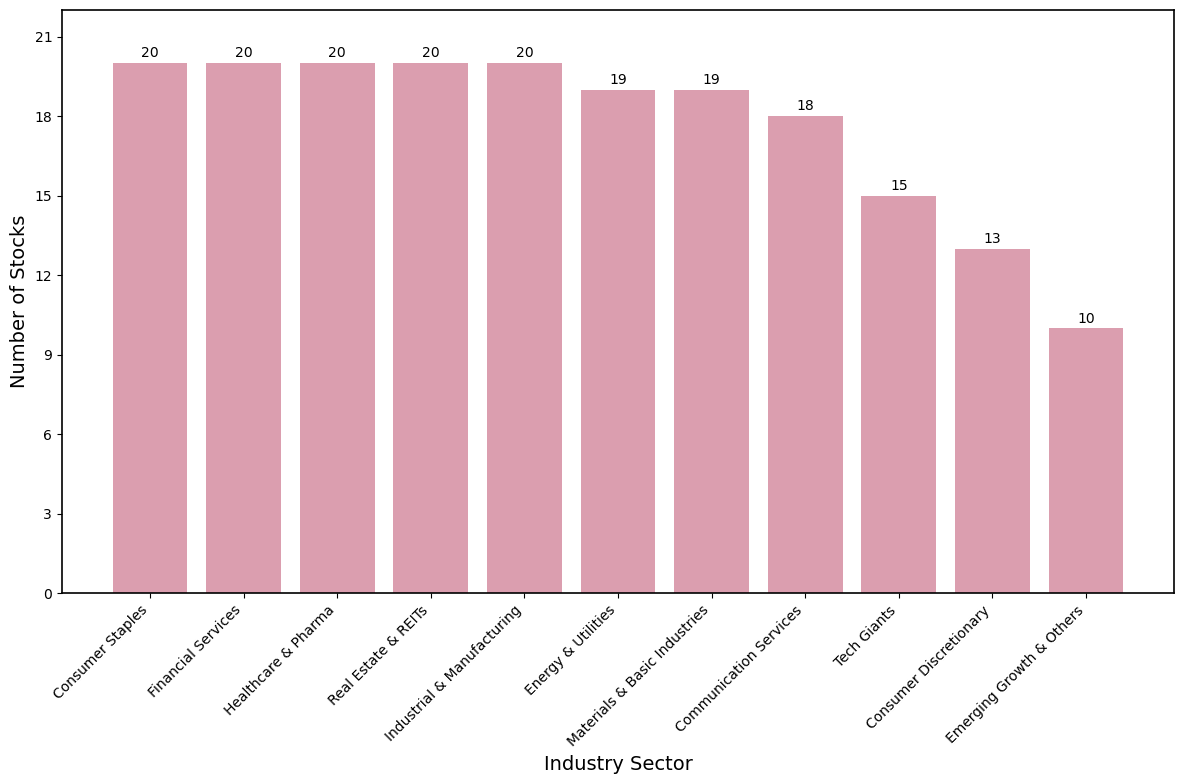

In [4]:
# market data visualization 
from collections import Counter

# figure 1: GICS sector breakdown data 
plt.rcParams.update({
    'font.size': 12,
    'axes.linewidth': 1.2,
    'axes.labelsize': 12,
    'axes.titlesize': 13,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 14,
    'lines.linewidth': 1.5,
    'axes.grid': False,
    'axes.axisbelow': True,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white'
})

def get_market_cap_category(ticker):
    try:
        stock = yf.Ticker(ticker)
        info = stock.info
        market_cap = info.get('marketCap', None)
        if market_cap is None:
            return 'Unknown'
        elif market_cap >= 10e9:
            return 'Large Cap (≥ $10B)'
        elif 2e9 <= market_cap < 10e9:
            return 'Mid Cap ($2B–$10B)'
        elif market_cap < 2e9:
            return 'Small Cap (< $2B)'
        else:
            return 'Unknown'
    except Exception as e:
        return 'Unknown'

sector_map = {
    **dict.fromkeys(['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA', 'NFLX', 'ADBE', 'CRM',
                     'ORCL', 'INTC', 'AMD', 'QCOM', 'AVGO', 'TXN', 'AMAT', 'LRCX', 'KLAC', 'MRVL'], 'Tech Giants'),
    **dict.fromkeys(['JPM', 'BAC', 'WFC', 'C', 'GS', 'MS', 'BK', 'USB', 'PNC', 'TFC',
                     'COF', 'AXP', 'V', 'MA', 'PYPL', 'BRK-B', 'BLK', 'SPGI', 'ICE', 'CME'], 'Financial Services'),
    **dict.fromkeys(['JNJ', 'PFE', 'UNH', 'ABT', 'TMO', 'DHR', 'BMY', 'MRK', 'ABBV', 'AMGN',
                     'GILD', 'BIIB', 'REGN', 'VRTX', 'ILMN', 'ISRG', 'SYK', 'BSX', 'MDT', 'EW'], 'Healthcare & Pharma'),
    **dict.fromkeys(['AMZN', 'TSLA', 'HD', 'MCD', 'NKE', 'SBUX', 'TJX', 'LOW', 'BKNG', 'ABNB',
                     'DIS', 'NFLX', 'CMCSA', 'VZ', 'T', 'CHTR', 'TMUS', 'ROKU', 'SPOT', 'UBER'], 'Consumer Discretionary'),
    **dict.fromkeys(['PG', 'KO', 'PEP', 'WMT', 'COST', 'CL', 'KMB', 'GIS', 'K', 'CPB',
                     'TSN', 'HRL', 'SJM', 'CAG', 'MKC', 'CLX', 'CHD', 'EL', 'ULTA', 'TGT'], 'Consumer Staples'),
    **dict.fromkeys(['BA', 'CAT', 'DE', 'GE', 'HON', 'UPS', 'FDX', 'LMT', 'RTX', 'NOC',
                     'MMM', 'EMR', 'ETN', 'ITW', 'PH', 'CMI', 'ROK', 'DOV', 'FTV', 'XYL'], 'Industrial & Manufacturing'),
    **dict.fromkeys(['XOM', 'CVX', 'COP', 'EOG', 'PXD', 'VLO', 'MPC', 'PSX', 'KMI', 'OKE',
                     'NEE', 'DUK', 'SO', 'AEP', 'EXC', 'XEL', 'PEG', 'ED', 'AWK', 'ATO'], 'Energy & Utilities'),
    **dict.fromkeys(['LIN', 'APD', 'ECL', 'SHW', 'FCX', 'NEM', 'FMC', 'LYB', 'DD', 'DOW',
                     'PPG', 'NUE', 'STLD', 'MLM', 'VMC', 'PKG', 'IP', 'WRK', 'SON', 'AVY'], 'Materials & Basic Industries'),
    **dict.fromkeys(['AMT', 'PLD', 'CCI', 'EQIX', 'SPG', 'O', 'WELL', 'AVB', 'EQR', 'DLR',
                     'BXP', 'VTR', 'ARE', 'MAA', 'UDR', 'CPT', 'KIM', 'REG', 'FRT', 'BRX'], 'Real Estate & REITs'),
    **dict.fromkeys(['GOOGL', 'META', 'NFLX', 'DIS', 'CMCSA', 'VZ', 'T', 'CHTR', 'TMUS', 'TWTR',
                     'SNAP', 'PINS', 'MTCH', 'IAC', 'FOXA', 'PARA', 'WBD', 'LUMN', 'SIRI', 'DISH'], 'Communication Services'),
    **dict.fromkeys(['SHOP', 'ZM', 'DOCU', 'OKTA', 'SNOW', 'PLTR', 'RBLX', 'HOOD', 'COIN', 'RIVN'], 'Emerging Growth & Others')
}

# get market caps and sectors for successfully downloaded tickers
sectors = []
for ticker in framework.successful_tickers:
    sectors.append(sector_map.get(ticker, 'Unknown'))

# set params for figure 
sector_counts = Counter(sectors)
fig, ax = plt.subplots(figsize=(12, 8))
sorted_sectors = sorted(sector_counts.items(), key=lambda x: x[1], reverse=True)
sector_names = [item[0] for item in sorted_sectors]
counts = [item[1] for item in sorted_sectors]

# set axis labels
bars = ax.bar(range(len(sector_names)), counts, 
              color='#D3869B', alpha=0.8, linewidth=0.5)
ax.set_xlabel('Industry Sector', fontsize=14, fontweight='normal')
ax.set_ylabel('Number of Stocks', fontsize=14, fontweight='normal')
ax.set_xticks(range(len(sector_names)))
ax.set_xticklabels(sector_names, rotation=45, ha='right', fontsize=10)
for i, (bar, count) in enumerate(zip(bars, counts)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{count}', ha='center', va='bottom', fontsize=10, fontweight='normal')

# Customize grid
ax.set_axisbelow(True)
ax.set_ylim(0, max(counts) * 1.1)
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# set plt params 
plt.tight_layout()
plt.savefig('figure_sector_distribution.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()
plt.rcdefaults()
